Import necessary libraries

In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Question i(a)

In [2]:
def convolve2D(input_array, kernel):
    
    # Dimensions of input and kernel
    n = len(input_array)
    k = len(kernel)

    # Padding size
    padding_size = k // 2

    # Padding the input array
    padded_array = [[0 for _ in range(n + 2 * padding_size)] for _ in range(n + 2 * padding_size)]
    for i in range(n):
        for j in range(n):
            padded_array[i + padding_size][j + padding_size] = input_array[i][j]

    # Initialize the output array
    output = [[0 for _ in range(n)] for _ in range(n)]

    # Convolution operation
    for i in range(n):
        for j in range(n):
            sum = 0
            for di in range(k):
                for dj in range(k):
                    sum += padded_array[i + di][j + dj] * kernel[di][dj]
            output[i][j] = sum

    return output

# Example input array (3x3)
input_array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Example kernel (2x2)
kernel = [
    [-1, 0],
    [0, 1]
]

# Perform convolution
output_array = convolve2D(input_array, kernel)

# Print the output array
for row in output_array:
    print(' '.join(map(str, row)))

1 2 3
4 4 4
7 4 4


Convolution in 2D: This operation is widely used in image processing and involves sliding the kernel over the input array (image), multiplying          overlapping elements, and summing these products to form a new array (filtered image).

Purpose: It's used for various purposes like edge detection, blurring, sharpening, and more in image processing.

Padding: Padding is crucial for handling the edges of the input array. Without padding, the size of the output array would be smaller than the input array, or the edges of the input array would not be properly processed.

Kernel Size: The choice of kernel size and values significantly affects the result of the convolution. Different kernels can extract different features from the input array.

Question i(b)

In [4]:
from PIL import Image
import numpy as np

# Define the convolution function
def convolve2D(input_array, kernel):
    n = len(input_array)
    k = len(kernel)

    # Padding size for 'same' convolution result
    padding_size = (k - 1) // 2

    # Padding the input array with zeros around the border
    padded_array = np.pad(input_array, [(padding_size, padding_size), (padding_size, padding_size)], mode='constant')

    # Initialize the output array with zeros
    output = np.zeros_like(input_array)

    # Perform convolution
    for i in range(n):
        for j in range(n):
            # Element-wise multiplication and sum
            output[i, j] = (kernel * padded_array[i:i+k, j:j+k]).sum()

    return output

# Load the image
im = Image.open('wings_of_liberty.png')

# Ensure the image is not too large, resize if it's larger than 200x200 pixels
if im.size[0] > 200 or im.size[1] > 200:
    im = im.resize((200, 200))

# Convert the image to a NumPy array
rgb = np.array(im.convert('RGB'))

# Extract the red channel
r_channel = rgb[:,:,0]

# Define the kernels
kernel1 = np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]])

kernel2 = np.array([[ 0, -1,  0],
                    [-1,  8, -1],
                    [ 0, -1,  0]])

# Perform convolution with kernel1
output_array1 = convolve2D(r_channel, kernel1)

# Perform convolution with kernel2
output_array2 = convolve2D(r_channel, kernel2)

# Convert the output arrays to uint8 to display as images
output_image1 = Image.fromarray(np.uint8(output_array1))
output_image2 = Image.fromarray(np.uint8(output_array2))

# Save the output images
output_image1.save('wings_of_liberty_convolved_kernel1.png')
output_image2.save('wings_of_liberty_convolved_kernel2.png')

Load the Image: The image wings_of_liberty.jpg is loaded from the file system. If the image is larger than 200x200 pixels, it is resized to ensure the convolution operation is not too computationally expensive.

Convert to NumPy Array: The image is converted to a NumPy array to facilitate easy manipulation. Each pixel in an image has three channels (Red, Green, Blue), and these are represented in the array.

Extract Red Channel: The script extracts only the red channel of the image because the convolution is being applied to a single channel for demonstration purposes.

Define Kernels: Two kernels are defined (kernel1 and kernel2). These are matrices that determine the nature of the convolution operation. kernel1 is a sharpening kernel, and kernel2 is an edge detection kernel.

Question ii(a)

Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week8.py" -OutFile "week8.py"

170498071/170498071 [==============================] - 38s 0us/step
orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                

INFO:tensorflow:Assets written to: cifar.model\assets


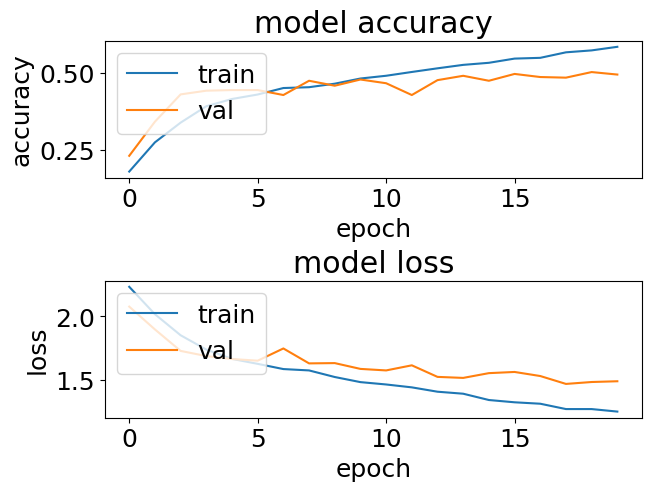

157/157 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       505
           1       0.63      0.80      0.71       460
           2       0.47      0.63      0.54       519
           3       0.65      0.37      0.47       486
           4       0.53      0.49      0.51       519
           5       0.79      0.36      0.50       488
           6       0.54      0.79      0.64       518
           7       0.73      0.61      0.66       486
           8       0.59      0.82      0.69       520
           9       0.70      0.62      0.66       498

    accuracy                           0.60      4999
   macro avg       0.63      0.60      0.60      4999
weighted avg       0.63      0.60      0.60      4999

[[281  25  25   5  12   0   4   9 125  19]
 [  6 367   1   0   6   0   6   5  39  30]
 [ 24   9 327   9  41  10  53  14  25   7]
 [  8  12  70 179  47  21 105  13  11  20]
 [ 20   7  96 

In [2]:

plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
